* ##### Exercise: Visualizing Patterns Over Time
* ##### Name: Barath Anandaraman
* ##### Course: DSC640-T301
* ##### Weeks 3 & 4: White House Logs
* ##### Date: 04/05/2025

---

#### Load Necessary Packages

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

sns.set(style="whitegrid")

#### Load waves access record for all the 12 months of the year 2023

In [2]:
# Define file paths
file_paths = [
    "Waves/2023.01_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.02_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.03_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.04_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.05_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.06_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.07_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.08_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.09_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.10_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.11_WAVES-ACCESS-RECORDS.csv",
    "Waves/2023.12_WAVES-ACCESS-RECORDS.csv"
]

In [3]:
# Load and concatenate all CSV files into a single DataFrame
df_list = [pd.read_csv(file, low_memory=False) for file in file_paths]
combined_df = pd.concat(df_list, ignore_index=True)

In [4]:
# Display basic info to understand the structure
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843216 entries, 0 to 843215
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Last Name                843152 non-null  object 
 1   First Name               843211 non-null  object 
 2   Middle Initial           842702 non-null  object 
 3   UIN                      842702 non-null  object 
 4   BDGNBR                   106295 non-null  float64
 5   Access Type              843216 non-null  object 
 6   TOA                      598175 non-null  object 
 7   POA                      8306 non-null    object 
 8   TOD                      8301 non-null    object 
 9   POD                      76013 non-null   object 
 10  Appointment Made Date    843215 non-null  object 
 11  Appointment Start Date   843216 non-null  object 
 12  Appointment End Date     843216 non-null  object 
 13  Appointment Cancel Date  275 non-null     object 
 14  Tota

#### Dataset has 29 columns and 843,216 rows

##### Column descriptions based on https://watchdoglab.substack.com/p/analysis-of-white-house-visitor-records
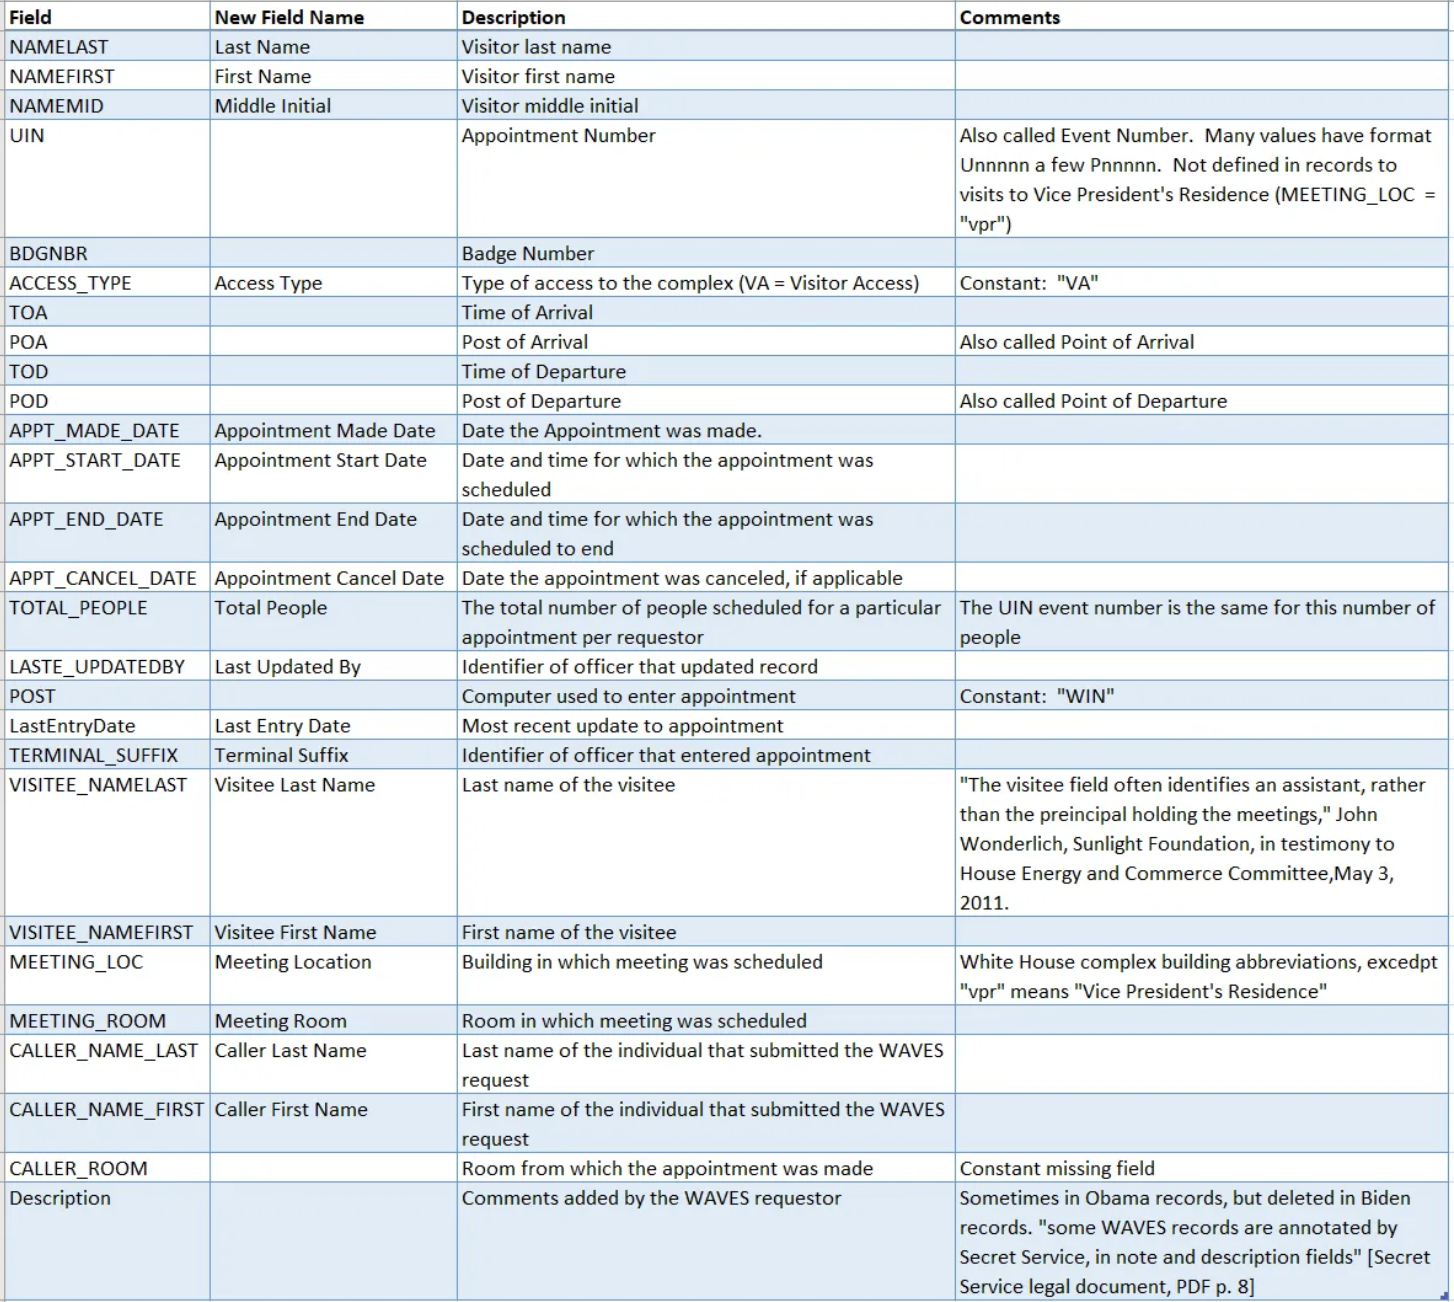

##### Function to check basic issues on the dataset

In [5]:
def checkIssues(df):
    """ Check for Issues on the dataframe """
    df_state = []
    columns = df.columns 
    for i in columns : 
        types = df[i].dtypes
        unique_value = df[i].nunique()         
        nan_value= df[i].isnull().sum() 
        value_count= df[i].isnull().count() 
        nan_percentage= round(nan_value/value_count*100,2)
        duplicated= df.duplicated().sum()   
        
        df_state.append ([i , types , unique_value , nan_value, nan_percentage,duplicated])
            
    df_state = pd.DataFrame(df_state)
    df_state.columns =['Name of column' , 'Types' ,'Unique_data' , 'NAN value', "NAN_percentage","Duplicated"]
    print(df_state)

In [6]:
# Check for issues visually on the dataset
checkIssues(combined_df)

             Name of column    Types  Unique_data  NAN value  NAN_percentage  \
0                 Last Name   object       143546         64            0.01   
1                First Name   object        67409          5            0.00   
2            Middle Initial   object           27        514            0.06   
3                       UIN   object        99351        514            0.06   
4                    BDGNBR  float64         2563     736921           87.39   
5               Access Type   object            1          0            0.00   
6                       TOA   object       118434     245041           29.06   
7                       POA   object            6     834910           99.01   
8                       TOD   object         2216     834915           99.02   
9                       POD   object           20     767203           90.99   
10    Appointment Made Date   object        50355          1            0.00   
11   Appointment Start Date   object    

---

#### Dataset check results

#### 1. Dataset has 1054 duplicates
#### 2. Out of 843,216 rows, columns with NAs
#####      CALLER_ROOM, Caller Room is 100% nulls
#####      Appointment Cancel Date, POA, TOD is over 99% nulls
#####      RELEASEDATE, POD is over 90% nulls
#### 3. Columns like Access Type, POST have just 1 value

#### Remove columns based on above results

##### Merge name columns and drop individual

In [7]:
combined_df['VisitorName'] = combined_df['First Name'].str.cat([combined_df['Middle Initial'], 
                                                         combined_df['Last Name']], sep='-')
combined_df['VisiteeName'] = combined_df['Visitee First Name'].str.cat([combined_df['Visitee Last Name']]
                                                                       , sep='-')
combined_df['CallerName'] = combined_df['Caller First Name'].str.cat([combined_df['Caller Last Name']]
                                                                       , sep='-')

In [8]:
# Remove multiple columns
combined_df = combined_df.drop(['CALLER_ROOM', 'Caller Room', 'Appointment Cancel Date', 
                                'POA', 'TOD', 'RELEASEDATE', 'POD', 'Access Type', 'POST',
                               'First Name', 'Middle Initial', 'Last Name', 'UIN', 'BDGNBR',
                               'Visitee First Name', 'Visitee Last Name', 'Release Date',
                               'Caller First Name','Caller Last Name'], axis=1)

In [9]:
# Drop duplicates
combined_df = combined_df.drop_duplicates()

In [10]:
combined_df.head(5)

,TOA,Appointment Made Date,Appointment Start Date,Appointment End Date,Total People,Last Updated By,Last Entry Date,Terminal Suffix,Meeting Location,Meeting Room,VisitorName,VisiteeName,CallerName
0,Jan 19 2023 8:58AM,1/5/2023 17:16,1/19/2023 9:00,1/19/2023 23:59,5.0,DE,1/5/2023 18:07,DE,OEOB,Bowling Alley - 037,MARY-A-AABYE,Diana-Epstein,DIANA-EPSTEIN
1,Jan 3 2023 9:37AM,12/27/2022 1:33,1/3/2023 9:30,1/3/2023 23:59,2.0,VW,12/27/2022 5:57,VW,WH,EW TOUR,CARLO-B-AALST,Visitors-Office,VISITORSOFFICE-WAVES
2,Jan 31 2023 10:42AM,1/30/2023 22:27,1/31/2023 10:45,1/31/2023 23:59,3.0,PK,1/31/2023 5:32,PK,OEOB,425,SCOTT-I-AARONSON,Caitlin-Durkovich,PUNEET-KHAN
3,NaN,12/28/2022 2:04,1/4/2023 10:00,1/4/2023 23:59,1.0,VW,12/28/2022 8:10,VW,WH,EW TOUR,JOHN-C-ABAD,Visitors-Office,VISITORSOFFICE-WAVES
4,Jan 21 2023 9:46AM,1/14/2023 1:33,1/21/2023 9:30,1/21/2023 23:59,17.0,VW,1/14/2023 12:56,VW,WH,EW TOUR,NATHAN-D-ABADIE,Visitors-Office,VISITORSOFFICE-WAVES


In [11]:
# Convert dateTime format for all date related columns
combined_df['Appointment Made Date'] = pd.to_datetime(combined_df['Appointment Made Date'])
combined_df['Appointment Start Date'] = pd.to_datetime(combined_df['Appointment Start Date'])
combined_df['Appointment End Date'] = pd.to_datetime(combined_df['Appointment End Date'])
combined_df['Last Entry Date'] = pd.to_datetime(combined_df['Last Entry Date'])
toa_time = pd.to_datetime(combined_df['TOA'], errors='coerce').dt.time
combined_df['TOA1'] = pd.to_datetime(combined_df['Appointment Start Date'].dt.date.astype(str) + ' ' + 
                                    toa_time.astype(str),errors='coerce')

In [12]:
# Extract visit month
combined_df['VisitMonth'] = combined_df['Appointment Start Date'].dt.to_period('M')

---

### Visual 1: Bar plot

#### Check which month has highest visits

In [13]:
# Group by monthly visits
monthly_visits = (
    combined_df.groupby(['VisitMonth'])
    .size()
    .reset_index(name='VisitCount')
)

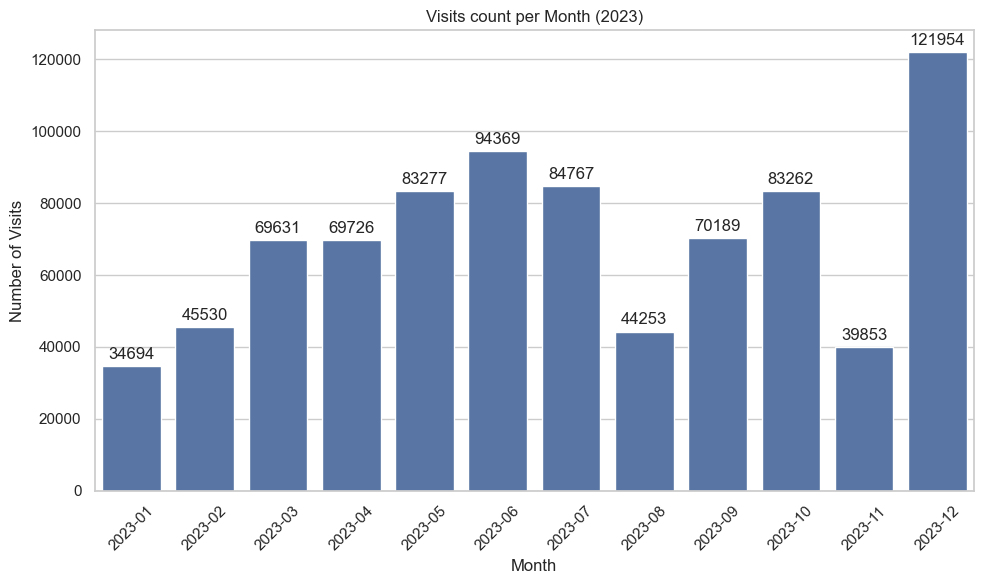

In [14]:
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=monthly_visits, x='VisitMonth', y='VisitCount')
plt.title("Visits count per Month (2023)")
plt.xlabel("Month")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)

# Annotate bars
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0,3),
                     textcoords="offset points",
                     ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### 1. December has the highest number of visits 121,954
#### 2. January has the lowest number of visits 34,694

---

### Visual 2: Stacked plot

#### Check the Top 5 Visitors for the highest and lowest visited month

In [15]:
# Identify Top 5 visitees
top5_visitees = combined_df['VisiteeName'].value_counts().head(5).index.tolist()

# Filter for Top 5 visitees
top5_df = combined_df[combined_df['VisiteeName'].isin(top5_visitees)]

In [16]:
# Group by month and visitee
monthly_visitee_counts = (
    top5_df.groupby(['VisitMonth', 'VisiteeName'])
    .size()
    .reset_index(name='VisitCount')
    .sort_values(['VisitMonth','VisiteeName'])
)

In [17]:
# Pivot for stacked bar chart
pivot_df = monthly_visitee_counts.pivot(index='VisitMonth', columns = 'VisiteeName', 
                                        values='VisitCount').fillna(0)

<function matplotlib.pyplot.show(close=None, block=None)>

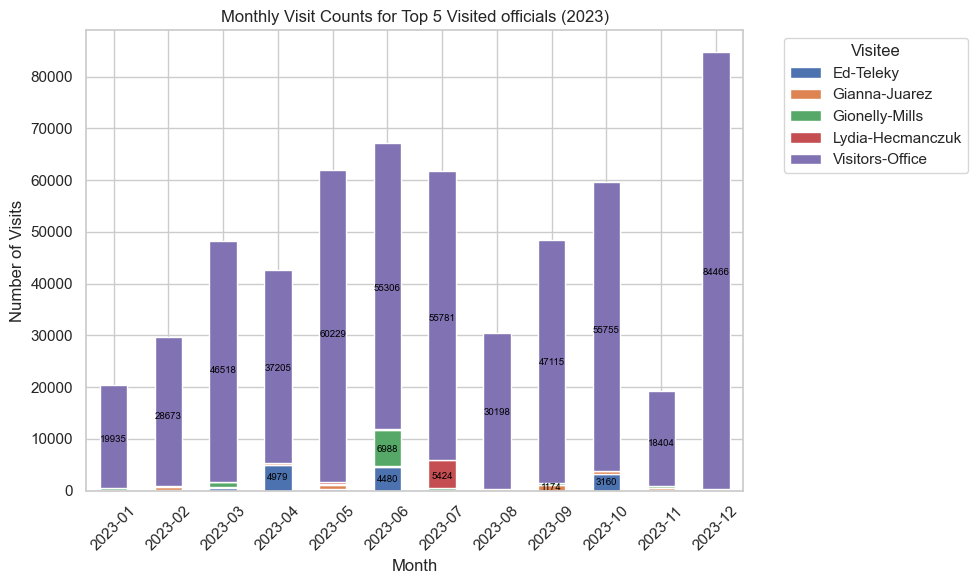

In [18]:
# Plot stacked bar chart
ax = pivot_df.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title("Monthly Visit Counts for Top 5 Visited officials (2023)")
plt.xlabel("Month")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.legend(title="Visitee",bbox_to_anchor=(1.05,1), loc='upper left')
# Add count labels to each stack
for i, month in enumerate(pivot_df.index):
    cumulative = 0
    for visitee in pivot_df.columns:
        value = pivot_df.loc[month, visitee]
        if(value >1000):
            ax.text(i, cumulative + value / 2, int(value),
                   ha = 'center', va = 'center', fontsize=7,color = 'black')
            cumulative += value
plt.tight_layout()
plt.show
              

#### 1. Visitors Office has the highest number of visits throughout the year.
#### 2. December being highest count if 84,466 and November has lowest with 18,404

---

### Visual 3: Scatter plot

#### Scatter plot by hour of day on the delayed appointments

In [19]:
copy_df = combined_df.copy()
copy_df = copy_df[copy_df['VisiteeName'] == 'Visitors-Office']

# STEP 2: Create arrival datetime and calculate delay in minutes
copy_df = copy_df.dropna(subset=['TOA1', 'Appointment Start Date'])
copy_df['Arrival Datetime'] = pd.to_datetime(
copy_df['Appointment Start Date'].dt.date.astype(str) + ' ' +
    copy_df['TOA1'].dt.time.astype(str), errors='coerce'
)
copy_df['Arrival Delay (min)'] = (
    (copy_df['Arrival Datetime'] - copy_df['Appointment Start Date']).dt.total_seconds() / 60
)


In [20]:
# STEP 3: Classify delay status
def classify_delay(delay):
    if pd.isna(delay):
        return 'Unknown'
    elif delay < -5:
        return 'Early'
    elif -5 <= delay <= 5:
        return 'On Time'
    else:
        return 'Delayed'

copy_df['Arrival Status'] = copy_df['Arrival Delay (min)'].apply(classify_delay)

# STEP 4: Filter only delayed arrivals
delayed_df = copy_df[copy_df['Arrival Status'] == 'Delayed'].copy()
delayed_df['Arrival Hour'] = delayed_df['TOA1'].dt.hour


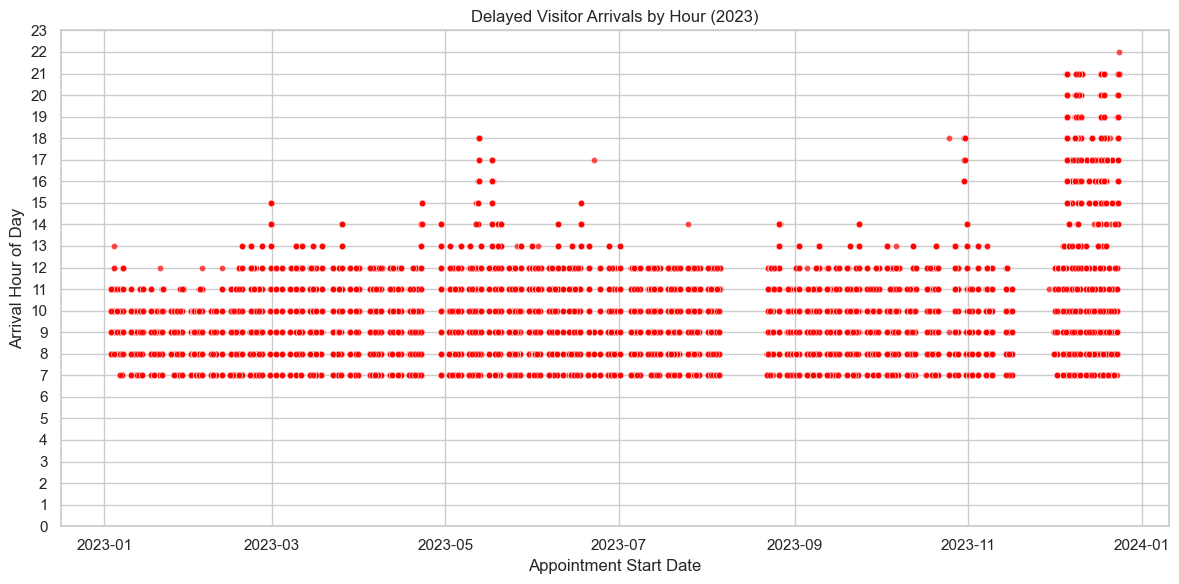

In [21]:
# STEP 5: Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=delayed_df, x='Appointment Start Date', y='Arrival Hour', color='red', alpha=0.7, s=20)
plt.title("Delayed Visitor Arrivals by Hour (2023)")
plt.xlabel("Appointment Start Date")
plt.ylabel("Arrival Hour of Day")
plt.yticks(range(0, 24))
plt.tight_layout()
plt.show()

#### Usual appointments starts at 7 AM and ends by 12 Noon
#### Certain occasions and more on December appointments were given even till 10 PM

---

### Visual 4. Line Chart

#### Check for any correlation between delays on arrival vs the appointment counts during the hour

In [22]:
# Group by appointment hour to calculate  total people and average delay
copy_df['AppointmentHour'] = copy_df['Appointment Start Date'].dt.hour
total_people_by_hour = (
    copy_df.groupby('AppointmentHour')
    .agg({'Total People': 'sum', 'Arrival Delay (min)': 'mean'})
    .reset_index()
    .dropna()
)

In [23]:
total_people_by_hour[total_people_by_hour['AppointmentHour'] <4]

,AppointmentHour,Total People,Arrival Delay (min)


In [24]:
total_people_by_hour[total_people_by_hour['AppointmentHour'] >21]

,AppointmentHour,Total People,Arrival Delay (min)
15,22,2.0,-723.5
16,23,4.0,-711.0


In [25]:
# Remove the bad data
total_people_by_hour.drop(total_people_by_hour[total_people_by_hour['AppointmentHour'] 
                          >21].index, inplace=True)

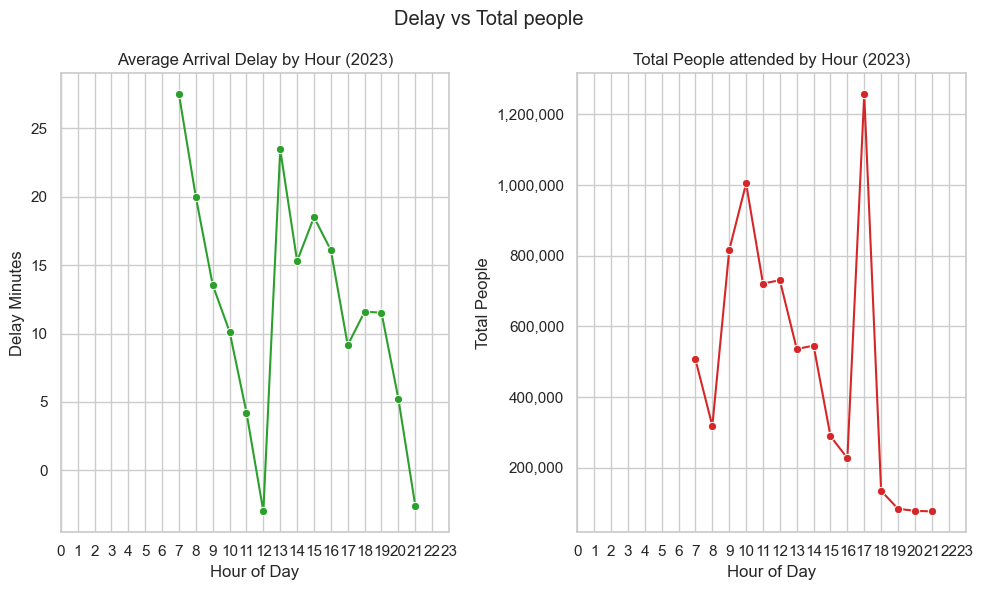

In [26]:
# Plot dual line chart for Delay vs Total People
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6), 
                              sharex=True)
hour_ticks= list(range(0,24))

sns.lineplot(ax=ax1, data = total_people_by_hour, x='AppointmentHour', y='Arrival Delay (min)',
            marker='o', color='tab:green')
ax1.set_title('Average Arrival Delay by Hour (2023)')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Delay Minutes')
ax1.set_xticks(hour_ticks)
ax1.grid(True)

sns.lineplot(ax=ax2, data = total_people_by_hour, x='AppointmentHour', y='Total People',
            marker='o', color='tab:red')
ax2.set_title('Total People attended by Hour (2023)')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Total People')
ax2.set_xticks(hour_ticks)
ax2.grid(True)
comma_format = FuncFormatter(lambda x, _: f'{int(x):,}')
ax2.yaxis.set_major_formatter(comma_format)

plt.suptitle('Delay vs Total people ')
plt.tight_layout()
plt.show()

#### Total People attended in 5 PM evening is an anomaly and it could be on December.
#### Early morning hours are having more delays, and it reduces till Noon
#### Delays after noon are again higher and continues to reduce

---

### Visual 5: Step Chart

#### Check Late arrivals by Month

In [27]:
late_by_month = (
    copy_df[copy_df['Arrival Delay (min)']>5]
    .groupby('VisitMonth')
    .size()
    .reset_index(name='LateArrivals')
    .sort_values('VisitMonth')
)

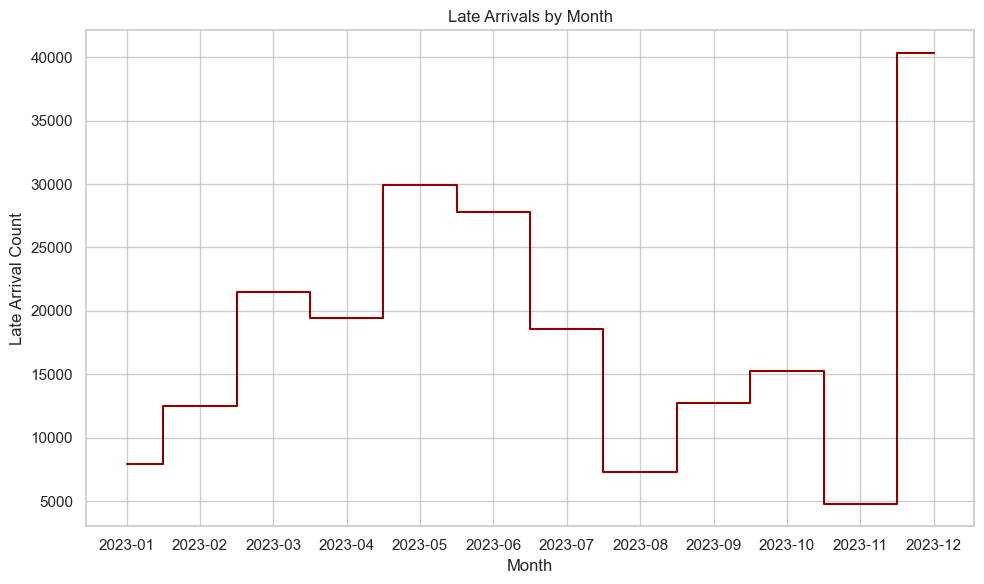

In [28]:
plt.figure(figsize=(10,6))
plt.step(late_by_month['VisitMonth'].astype(str), late_by_month['LateArrivals'],
         where='mid', color='darkred')
plt.title("Late Arrivals by Month")
plt.xlabel("Month")
plt.ylabel("Late Arrival Count")
plt.grid(True)
plt.tight_layout()
plt.show()
           

#### Step shows very high number of delays on December
#### Also lowest impacted counts on the month of August and January

---

### Visual 6: Bubble Chart

#### Check if there are any repeat visitors

In [37]:
# Create visit date
copy_df['VisitDate'] = copy_df['Appointment Start Date'].dt.date

In [38]:
# Count visits per visitor per day
daily_dupes = (
    copy_df.groupby(['VisitorName','VisitDate'])
    .size()
    .reset_index(name='VisitCount')
)

In [45]:
# Identify top 25 visitors by total repeated visits
top_repeaters = (
    daily_dupes[daily_dupes['VisitCount']>1]
    .groupby('VisitorName')['VisitCount']
    .sum()
    .reset_index()
    .sort_values(by='VisitCount', ascending=False)
    .head(25)
)

In [46]:
# Filter data only for Top 25
filtered_bubble_df = daily_dupes[
    daily_dupes['VisitorName'].isin(top_repeaters['VisitorName'])
]

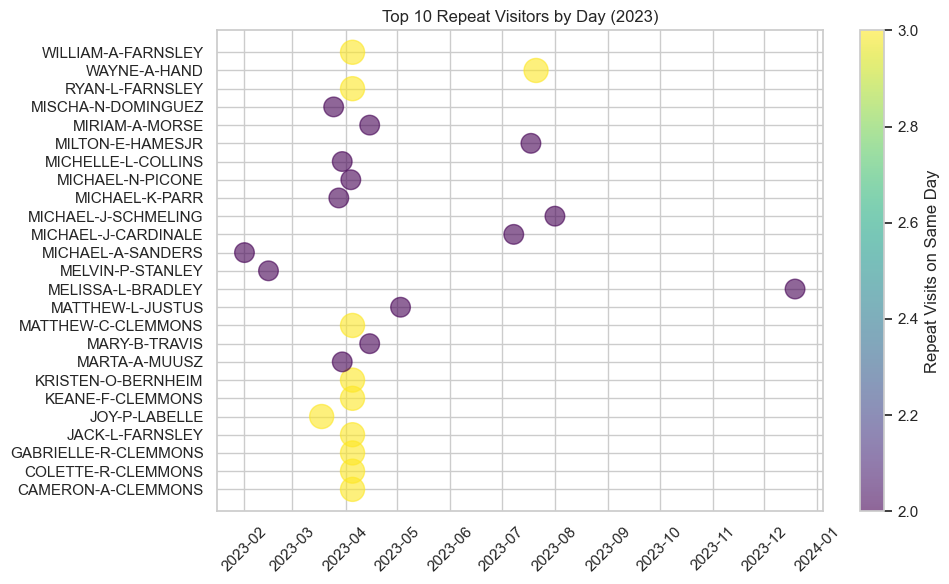

In [47]:
# Create Bubble chart
plt.figure(figsize=(10,6))
plt.scatter(
    x=filtered_bubble_df['VisitDate'],
    y=filtered_bubble_df['VisitorName'],
    s=filtered_bubble_df['VisitCount'] * 100,
    alpha=0.6,
    c=filtered_bubble_df['VisitCount'],
    cmap='viridis',
    marker='o'
)

plt.title("Top 10 Repeat Visitors by Day (2023)")
plt.xticks(rotation=45)
plt.colorbar(label='Repeat Visits on Same Day')
plt.tight_layout()
plt.show()

#### Month of April has some visitors who have visited 3 times more than any time on the year

---

### Summary

#### 1. It is highly likely that during month of December there was some political event, that may have caused increase on visits and delays.
#### 2. Lowest visits is on January, November and August
#### 3. Scatter plots suggests break in data, that can be analyzed later
#### 4. Line chart suggests that there is very less correlation between number of people entering and delays incurred is noticed.
#### 5. This means the delays in early mornings and after lunch may not be related.
#### 6. Step chart also convinces the data on bar chart as well.
#### 7. Bubble chart on repeated visitors shows multiple visitors during the month of April visited atleast 3 times.


---